## Installing the libraries

In [62]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
random_seed = 501
np.random.seed(random_seed)

## Read dataset

In [64]:
dataset = pd.read_csv('/content/mos2_raw.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X[:10])
print(y[:10])
df_describe = pd.DataFrame(dataset)
df_describe.describe()

[[0 2.0 'Face Down (Flat)' 50 500 13 10]
 [0 2.0 'Face Down (Flat)' 100 500 12 15]
 [1 2.0 'Face Down (Flat)' 150 500 11 10]
 [0 2.0 'Face Down (Tilted)' 150 500 11 15]
 [1 2.0 'Face Down (Tilted)' 200 500 10 5]
 [1 2.0 'Face Down (Tilted)' 100 500 12 10]
 [1 2.0 'Face Down (Flat)' 100 500 12 5]
 [0 2.0 'Face Down (Tilted)' 150 500 11 5]
 [1 2.0 'Face Down (Tilted)' 200 500 10 10]
 [1 2.0 'Face Down (Tilted)' 200 500 10 15]]
[0 0 0 0 0 0 0 0 0 0]


,Add NaCl,Distance of S outside Furnace (in cm),Flow rate (sccm),Reaction Temperature (°C),Ramp time (min),Reaction time (min),Result
count,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.29000,2.104333,71.633333,727.950000,15.900000,11.510000,0.610000
std,0.45452,0.448947,42.325766,94.487957,2.030701,3.099773,0.488565
min,0.00000,0.500000,10.000000,500.000000,10.000000,5.000000,0.000000
25%,0.00000,2.000000,40.000000,700.000000,15.000000,10.000000,0.000000
50%,0.00000,2.000000,60.000000,725.000000,16.000000,10.000000,1.000000
75%,1.00000,2.500000,80.000000,750.000000,17.000000,15.000000,1.000000
max,1.00000,3.500000,250.000000,975.000000,30.000000,15.000000,1.000000


## Encoding the Independent Variable

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [66]:
print(X[:10])

[[1.0 0.0 0 2.0 50 500 13 10]
 [1.0 0.0 0 2.0 100 500 12 15]
 [1.0 0.0 1 2.0 150 500 11 10]
 [0.0 1.0 0 2.0 150 500 11 15]
 [0.0 1.0 1 2.0 200 500 10 5]
 [0.0 1.0 1 2.0 100 500 12 10]
 [1.0 0.0 1 2.0 100 500 12 5]
 [0.0 1.0 0 2.0 150 500 11 5]
 [0.0 1.0 1 2.0 200 500 10 10]
 [0.0 1.0 1 2.0 200 500 10 15]]


In [67]:
columns = [
  'Face Down (Flat)',
  'Face Down (Tilted)	',
  'Add NaCl',
  'Distance of S outside Furnace (in cm)',
  'Flow rate (sccm)',
  'Reaction Temperature (°C)',
  'Ramp time (min)',
  'Reaction time (min)',
]

## Splitting the dataset into the Training set and Test set

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_seed)

In [69]:
print(X_train)

[[1.0 0.0 1 ... 700 15 15]
 [1.0 0.0 1 ... 720 15 13]
 [1.0 0.0 1 ... 700 15 10]
 ...
 [1.0 0.0 1 ... 730 16 10]
 [1.0 0.0 0 ... 725 15 10]
 [0.0 1.0 0 ... 700 15 15]]


## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score 

# Train
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.65
Precision: 0.6444444444444445
Recall: 0.8529411764705882
Confusion matrix: 
 [[10 16]
 [ 5 29]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Tuned Hyperparameters : {'C': 1.0}
Accuracy : 0.6916666666666667


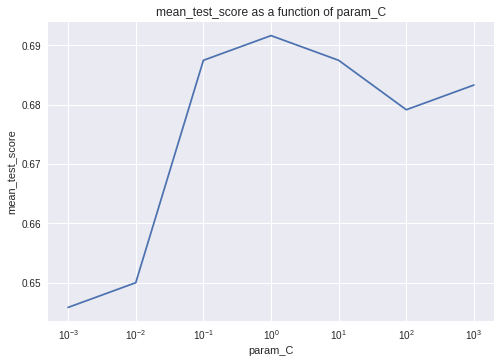

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018612,0.005252,0.000514,0.000053,0.001,{'C': 0.001},0.708333,0.708333,0.541667,0.625000,0.666667,0.708333,0.541667,0.541667,0.666667,0.750000,0.645833,0.075116,7
1,0.018342,0.010102,0.000598,0.000210,0.01,{'C': 0.01},0.708333,0.708333,0.541667,0.666667,0.583333,0.708333,0.583333,0.625000,0.666667,0.708333,0.650000,0.059512,6
2,0.018873,0.010341,0.000730,0.000557,0.1,{'C': 0.1},0.750000,0.708333,0.666667,0.666667,0.666667,0.708333,0.666667,0.708333,0.666667,0.666667,0.687500,0.027951,2
3,0.017358,0.007381,0.000516,0.000075,1.0,{'C': 1.0},0.791667,0.708333,0.625000,0.666667,0.666667,0.666667,0.666667,0.750000,0.666667,0.708333,0.691667,0.046398,1
4,0.026348,0.008852,0.000806,0.000367,10.0,{'C': 10.0},0.791667,0.708333,0.625000,0.666667,0.666667,0.666667,0.625000,0.750000,0.666667,0.708333,0.687500,0.050173,3
5,0.020193,0.006733,0.000839,0.000537,100.0,{'C': 100.0},0.708333,0.708333,0.625000,0.666667,0.666667,0.666667,0.625000,0.750000,0.666667,0.708333,0.679167,0.037500,5
6,0.020087,0.006728,0.000827,0.000444,1000.0,{'C': 1000.0},0.708333,0.708333,0.625000,0.666667,0.666667,0.666667,0.666667,0.750000,0.666667,0.708333,0.683333,0.033333,4


In [71]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
parameters = {
    'C'       : np.logspace(-3,3,7),
}
clf = GridSearchCV(model,
                   param_grid=parameters,
                   cv=10)
clf.fit(X_train, y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

plt.plot(clf.cv_results_['param_C'], clf.cv_results_['mean_test_score'])
ax = plt.gca()
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('param_C')
plt.ylabel('mean_test_score')
plt.title('mean_test_score as a function of param_C')
plt.show()

pd.DataFrame(clf.cv_results_)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score 

# Train
model = LogisticRegression(random_state=random_seed, C=1.0)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.65
Precision: 0.6444444444444445
Recall: 0.8529411764705882
Confusion matrix: 
 [[10 16]
 [ 5 29]]


In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob = model.predict_proba(X_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.670814479638009


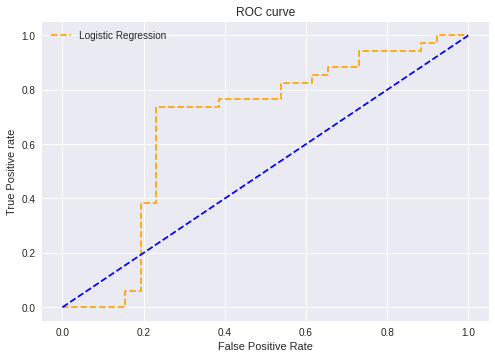

In [74]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Feature 0: Face Down (Flat), Score: 0.01811
Feature 1: Face Down (Tilted)	, Score: -0.01676
Feature 2: Add NaCl, Score: 0.05586
Feature 3: Distance of S outside Furnace (in cm), Score: -0.12338
Feature 4: Flow rate (sccm), Score: -0.01468
Feature 5: Reaction Temperature (°C), Score: -0.01240
Feature 6: Ramp time (min), Score: 0.48602
Feature 7: Reaction time (min), Score: 0.27288


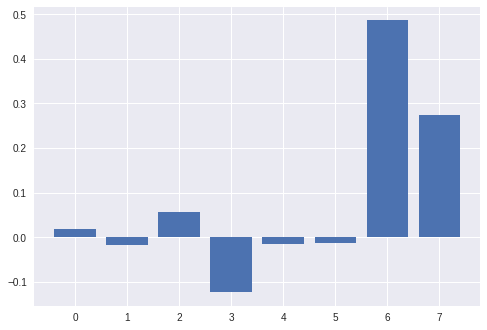

In [75]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %0d: %s, Score: %.5f' % (i, columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

# Train
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.8666666666666667
Precision: 0.8611111111111112
Recall: 0.9117647058823529
Confusion matrix: 
 [[21  5]
 [ 3 31]]


Tuned Hyperparameters : {'n_neighbors': 1}
Accuracy : 0.8791666666666667


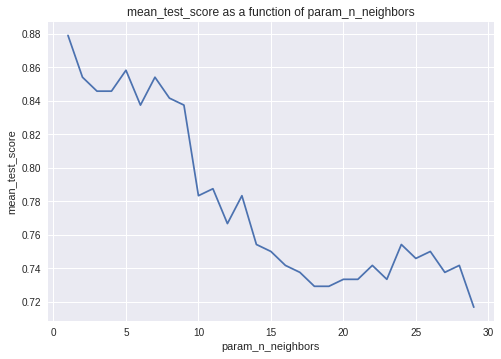

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001245,0.000146,0.002720,0.000378,1,{'n_neighbors': 1},0.833333,0.875000,0.875000,0.875000,0.875000,0.833333,1.000000,0.833333,0.875000,0.916667,0.879167,0.047324,1
1,0.001110,0.000046,0.003084,0.001410,2,{'n_neighbors': 2},0.833333,0.916667,0.791667,0.875000,0.833333,0.875000,0.958333,0.833333,0.666667,0.958333,0.854167,0.081756,3
2,0.001329,0.000360,0.003798,0.001754,3,{'n_neighbors': 3},0.833333,0.958333,0.791667,0.833333,0.875000,0.875000,0.958333,0.791667,0.666667,0.875000,0.845833,0.081330,5
3,0.001112,0.000129,0.003021,0.001137,4,{'n_neighbors': 4},0.833333,0.958333,0.791667,0.791667,0.875000,0.875000,0.875000,0.833333,0.666667,0.958333,0.845833,0.081330,5
4,0.001334,0.000629,0.003421,0.002027,5,{'n_neighbors': 5},0.916667,0.958333,0.708333,0.791667,0.916667,0.791667,0.958333,0.791667,0.833333,0.916667,0.858333,0.081650,2
5,0.002539,0.002635,0.004172,0.001823,6,{'n_neighbors': 6},0.916667,0.916667,0.666667,0.791667,0.916667,0.750000,0.875000,0.791667,0.833333,0.916667,0.837500,0.082180,8
6,0.001147,0.000162,0.002867,0.001038,7,{'n_neighbors': 7},0.916667,0.958333,0.666667,0.791667,0.916667,0.750000,0.916667,0.833333,0.875000,0.916667,0.854167,0.087896,3
7,0.001214,0.000154,0.005080,0.004608,8,{'n_neighbors': 8},0.916667,1.000000,0.666667,0.791667,0.916667,0.750000,0.750000,0.833333,0.875000,0.916667,0.841667,0.096465,7
8,0.001128,0.000026,0.003937,0.003305,9,{'n_neighbors': 9},0.958333,0.958333,0.666667,0.791667,0.875000,0.708333,0.833333,0.791667,0.875000,0.916667,0.837500,0.094004,8
9,0.002391,0.002210,0.003585,0.001325,10,{'n_neighbors': 10},0.916667,0.958333,0.666667,0.791667,0.791667,0.625000,0.708333,0.666667,0.833333,0.875000,0.783333,0.108333,12


In [77]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
parameters = {
    'n_neighbors': list(range(1,30)),
}
clf = GridSearchCV(model,
                   param_grid=parameters,
                   cv=10)
clf.fit(X_train, y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)



plt.plot(clf.cv_results_['param_n_neighbors'], clf.cv_results_['mean_test_score'])
plt.axis('tight')
plt.xlabel('param_n_neighbors')
plt.ylabel('mean_test_score')
plt.title('mean_test_score as a function of param_n_neighbors')
plt.show()

pd.DataFrame(clf.cv_results_)

In [78]:
# Train
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.8666666666666667
Precision: 0.8611111111111112
Recall: 0.9117647058823529
Confusion matrix: 
 [[21  5]
 [ 3 31]]


In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Train
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

# predict probabilities
pred_prob = model.predict_proba(X_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.8597285067873303


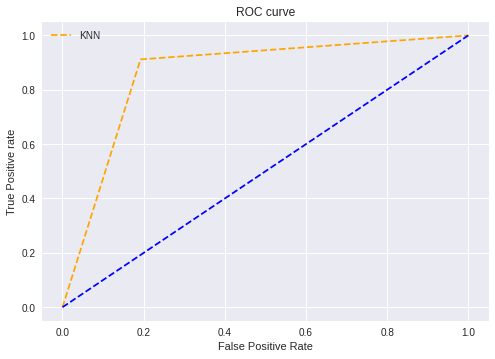

In [80]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Feature 0: Face Down (Flat), Score: 0.00000
Feature 1: Face Down (Tilted)	, Score: 0.00000
Feature 2: Add NaCl, Score: 0.00500
Feature 3: Distance of S outside Furnace (in cm), Score: 0.00750
Feature 4: Flow rate (sccm), Score: 0.03667
Feature 5: Reaction Temperature (°C), Score: 0.09167
Feature 6: Ramp time (min), Score: 0.25583
Feature 7: Reaction time (min), Score: 0.32083


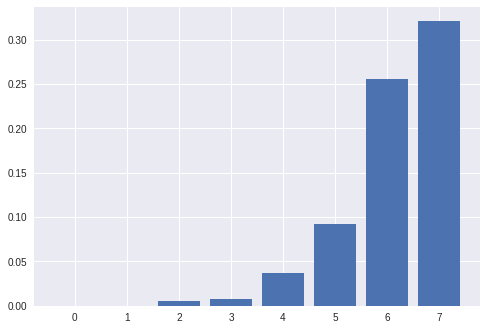

In [81]:
from sklearn.inspection import permutation_importance

# https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf

results = permutation_importance(model, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %0d: %s, Score: %.5f' % (i, columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Decision tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

# Train
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.9833333333333333
Precision: 0.9714285714285714
Recall: 1.0
Confusion matrix: 
 [[25  1]
 [ 0 34]]


Tuned Hyperparameters : {'max_depth': 8.0}
Accuracy : 0.8958333333333333


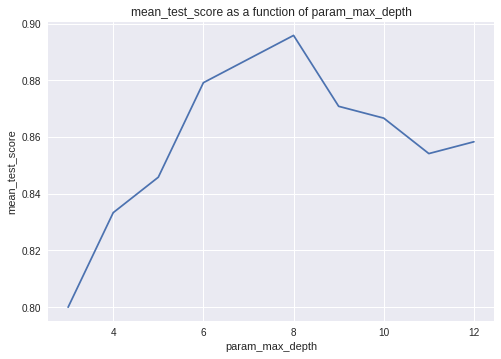

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001467,0.000215,0.000508,0.000055,3.0,{'max_depth': 3.0},0.791667,0.958333,0.750000,0.833333,0.750000,0.708333,0.750000,0.708333,0.833333,0.916667,0.800000,0.080795,10
1,0.003548,0.003663,0.000952,0.001021,4.0,{'max_depth': 4.0},0.875000,0.916667,0.875000,0.833333,0.750000,0.750000,0.750000,0.791667,0.833333,0.958333,0.833333,0.069722,9
2,0.001573,0.000136,0.001245,0.002101,5.0,{'max_depth': 5.0},0.833333,0.916667,0.833333,0.833333,0.833333,0.750000,0.875000,0.791667,0.833333,0.958333,0.845833,0.056057,8
3,0.002023,0.001621,0.003569,0.003942,6.0,{'max_depth': 6.0},0.833333,0.958333,0.750000,0.833333,0.916667,0.833333,0.916667,0.875000,0.875000,1.000000,0.879167,0.068338,3
4,0.005791,0.004667,0.000910,0.001202,7.0,{'max_depth': 7.0},0.916667,0.958333,0.791667,0.875000,0.833333,0.833333,0.916667,0.791667,0.958333,1.000000,0.887500,0.069846,2
5,0.004143,0.004052,0.003196,0.004323,8.0,{'max_depth': 8.0},0.875000,1.000000,0.833333,0.833333,0.875000,0.833333,0.916667,0.833333,0.958333,1.000000,0.895833,0.065219,1
6,0.002728,0.001962,0.000482,0.000035,9.0,{'max_depth': 9.0},0.875000,0.958333,0.791667,0.833333,0.875000,0.833333,0.916667,0.791667,0.833333,1.000000,0.870833,0.065749,4
7,0.002318,0.002149,0.001074,0.001767,10.0,{'max_depth': 10.0},0.916667,0.958333,0.791667,0.791667,0.875000,0.833333,0.875000,0.791667,0.833333,1.000000,0.866667,0.069222,5
8,0.002282,0.001812,0.000515,0.000040,11.0,{'max_depth': 11.0},0.875000,0.958333,0.791667,0.791667,0.833333,0.833333,0.833333,0.791667,0.833333,1.000000,0.854167,0.067828,7
9,0.001755,0.000331,0.000507,0.000035,12.0,{'max_depth': 12.0},0.916667,0.958333,0.791667,0.791667,0.833333,0.833333,0.833333,0.791667,0.833333,1.000000,0.858333,0.070218,6


In [83]:
model = DecisionTreeClassifier(random_state=random_seed)
parameters = {
    'max_depth': np.linspace(3, 12, 10),
}
clf = GridSearchCV(model,
                   param_grid=parameters,
                   cv=10)
clf.fit(X_train, y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

plt.plot(clf.cv_results_['param_max_depth'], clf.cv_results_['mean_test_score'])
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('param_max_depth')
plt.ylabel('mean_test_score')
plt.title('mean_test_score as a function of param_max_depth')
plt.show()

pd.DataFrame(clf.cv_results_)

Accuracy: 0.9166666666666666
Precision: 0.8717948717948718
Recall: 1.0
Confusion matrix: 
 [[21  5]
 [ 0 34]]


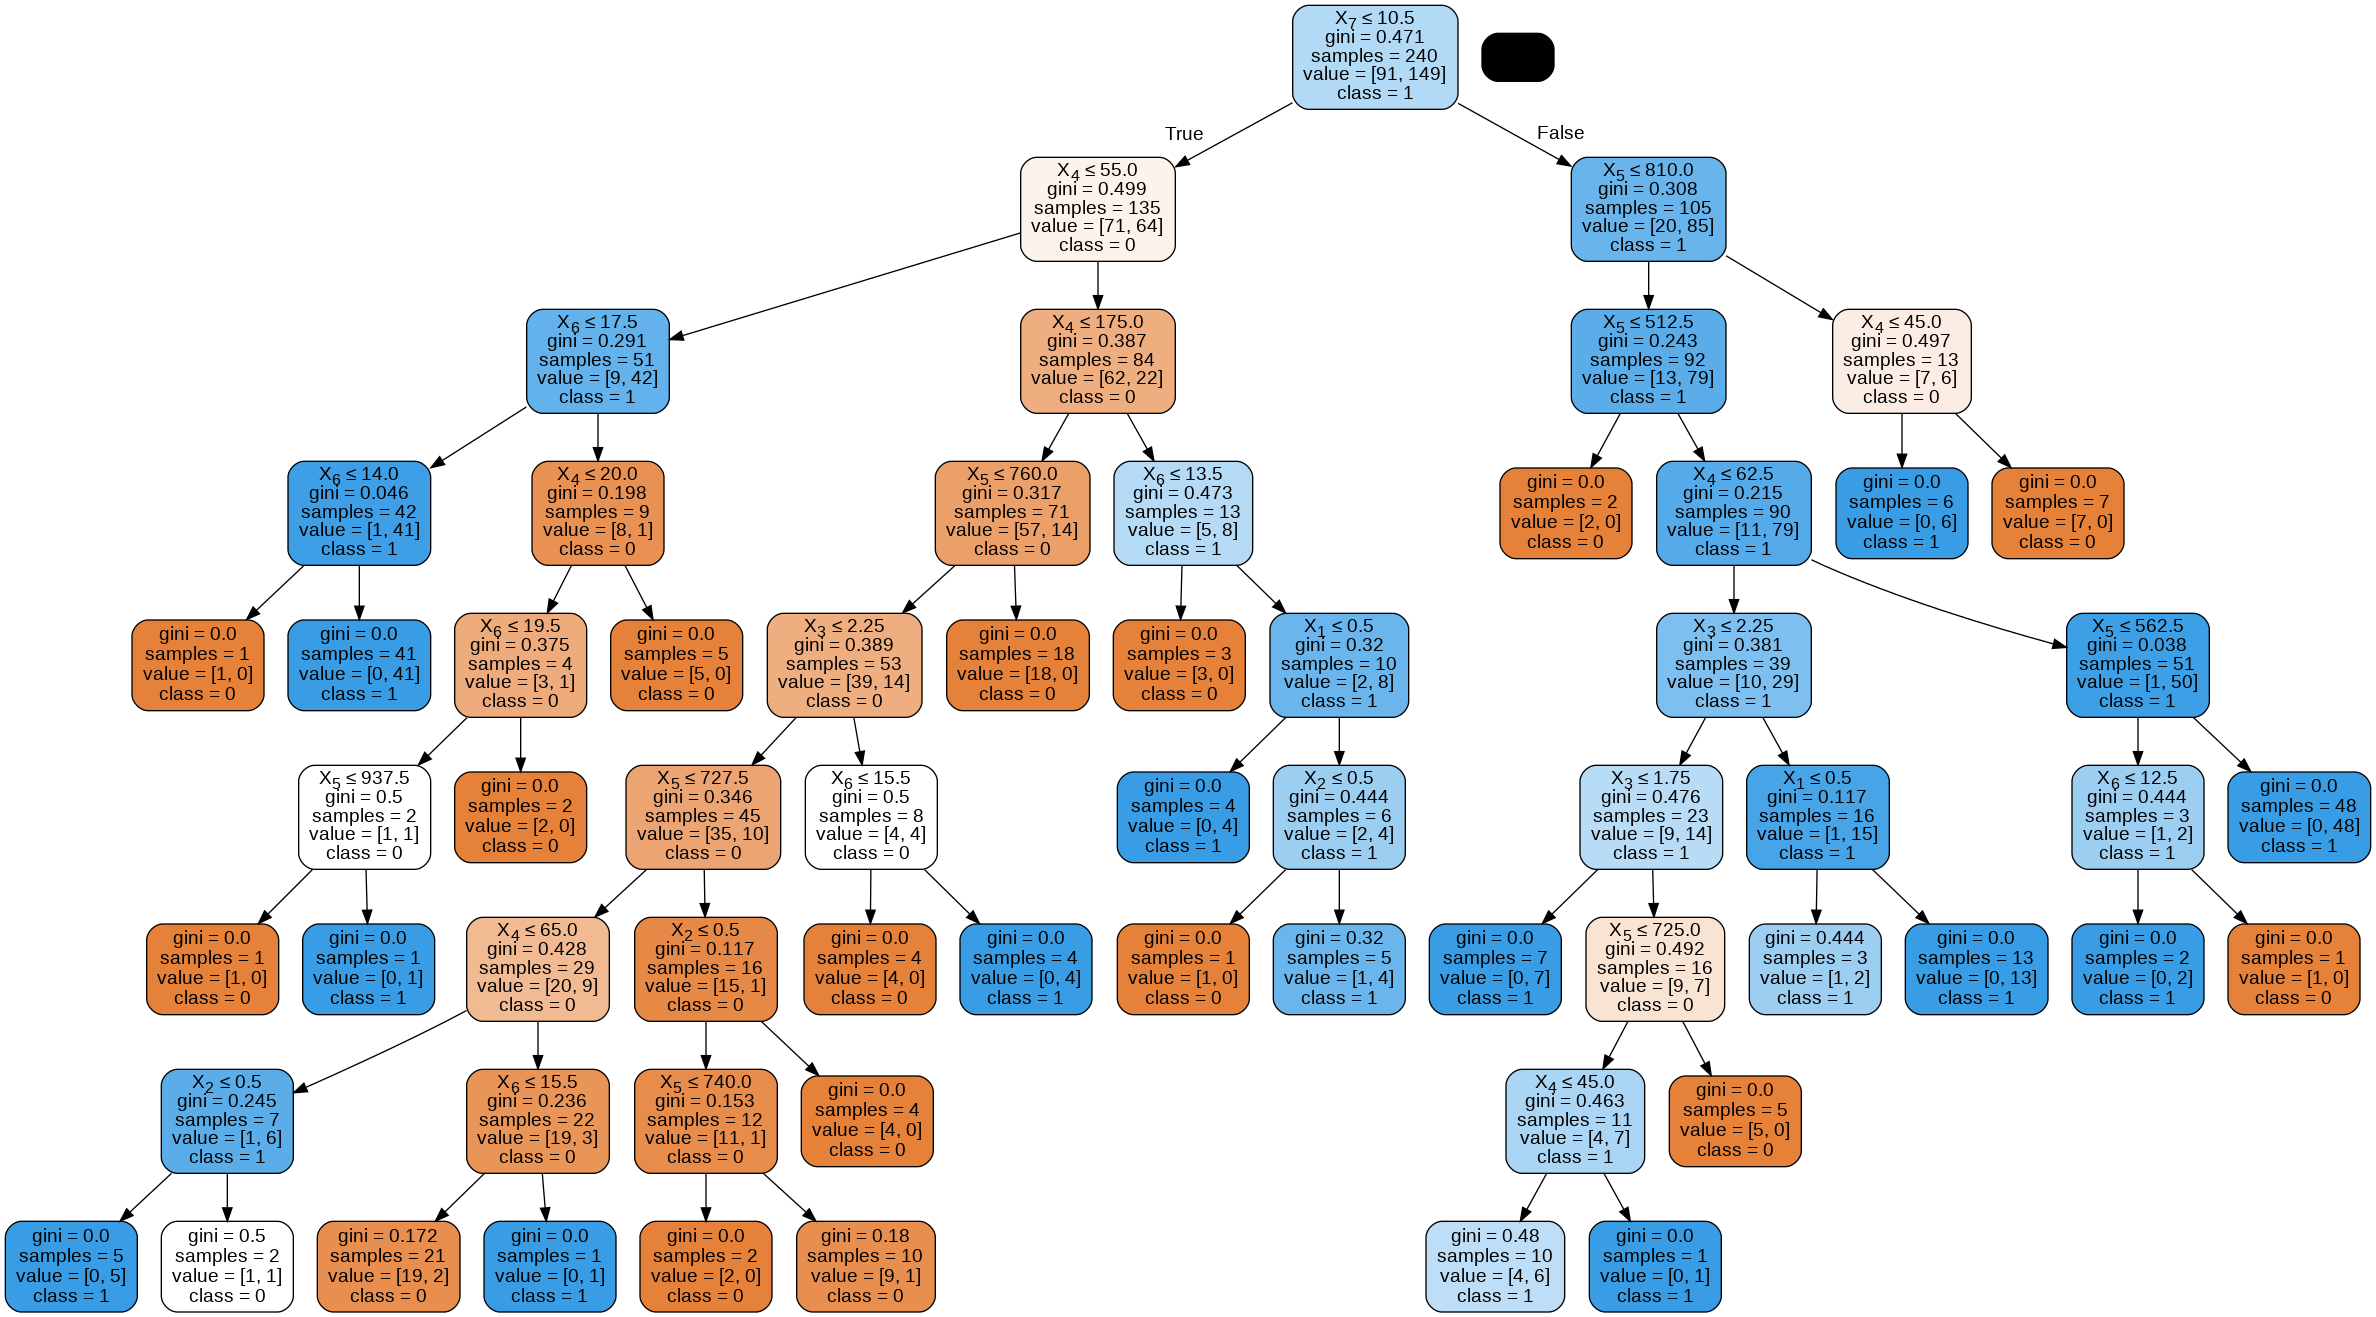

In [84]:
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Train
model = DecisionTreeClassifier(random_state=random_seed, max_depth=8)
model.fit(X_train,y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

# Plot
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('model_selection_tree.png')
Image(graph.create_png())

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob = model.predict_proba(X_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.9745475113122171


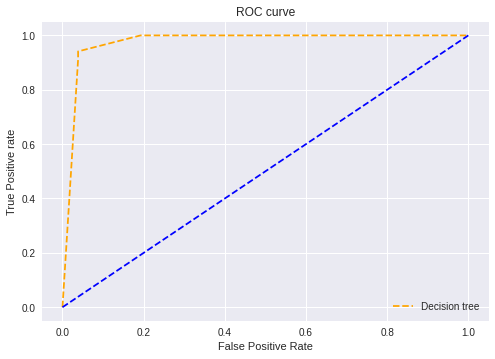

In [86]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Decision tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Feature 0: Face Down (Flat), Score: 0.00000
Feature 1: Face Down (Tilted)	, Score: 0.01088
Feature 2: Add NaCl, Score: 0.01844
Feature 3: Distance of S outside Furnace (in cm), Score: 0.06242
Feature 4: Flow rate (sccm), Score: 0.39345
Feature 5: Reaction Temperature (°C), Score: 0.14362
Feature 6: Ramp time (min), Score: 0.23670
Feature 7: Reaction time (min), Score: 0.13448


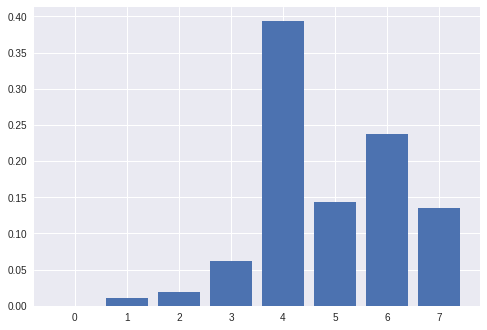

In [87]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %0d: %s, Score: %.5f' % (i, columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Random Forests

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Train
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.9166666666666666
Precision: 0.8918918918918919
Recall: 0.9705882352941176
Confusion matrix: 
 [[22  4]
 [ 1 33]]


Tuned Hyperparameters : {'max_depth': 7.0}
Accuracy : 0.9125000000000002


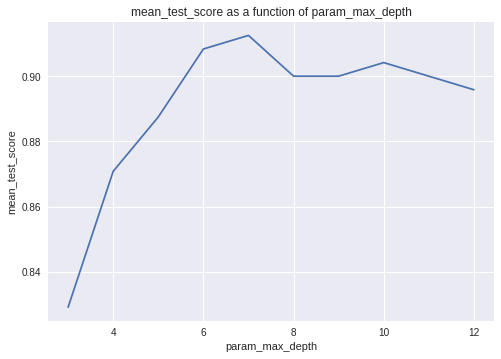

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.467539,0.135899,0.029987,0.015762,3.0,{'max_depth': 3.0},0.791667,0.916667,0.791667,0.916667,0.875000,0.791667,0.791667,0.750000,0.833333,0.833333,0.829167,0.054167,10
1,0.185002,0.073583,0.016946,0.015030,4.0,{'max_depth': 4.0},0.875000,0.916667,0.791667,0.916667,0.875000,0.750000,0.916667,0.833333,0.916667,0.916667,0.870833,0.057282,9
2,0.126378,0.003344,0.010081,0.001301,5.0,{'max_depth': 5.0},0.958333,0.958333,0.833333,0.875000,0.875000,0.791667,0.916667,0.875000,0.875000,0.916667,0.887500,0.049476,8
3,0.128066,0.005644,0.009536,0.000302,6.0,{'max_depth': 6.0},0.958333,1.000000,0.833333,0.916667,0.833333,0.791667,0.958333,0.875000,0.958333,0.958333,0.908333,0.066667,2
4,0.126803,0.004921,0.009426,0.000376,7.0,{'max_depth': 7.0},0.958333,1.000000,0.833333,0.875000,0.875000,0.833333,0.958333,0.875000,0.958333,0.958333,0.912500,0.057282,1
5,0.127051,0.003664,0.009952,0.001537,8.0,{'max_depth': 8.0},0.916667,1.000000,0.875000,0.875000,0.833333,0.833333,0.958333,0.875000,0.916667,0.916667,0.900000,0.050000,6
6,0.130022,0.008357,0.009732,0.000579,9.0,{'max_depth': 9.0},0.916667,1.000000,0.875000,0.833333,0.833333,0.833333,0.958333,0.875000,0.916667,0.958333,0.900000,0.056519,5
7,0.128275,0.004551,0.009732,0.000604,10.0,{'max_depth': 10.0},0.916667,1.000000,0.875000,0.833333,0.875000,0.833333,0.958333,0.875000,0.916667,0.958333,0.904167,0.052869,3
8,0.127953,0.003559,0.010202,0.001198,11.0,{'max_depth': 11.0},0.916667,1.000000,0.875000,0.833333,0.916667,0.833333,0.958333,0.875000,0.833333,0.958333,0.900000,0.056519,4
9,0.134547,0.010240,0.009706,0.000259,12.0,{'max_depth': 12.0},0.916667,1.000000,0.875000,0.833333,0.916667,0.833333,0.958333,0.875000,0.791667,0.958333,0.895833,0.062500,7


In [89]:
model = RandomForestClassifier(random_state=random_seed)
parameters = {
    'max_depth': np.linspace(3, 12, 10),
}
clf = GridSearchCV(model,
                   param_grid=parameters,
                   cv=10)
clf.fit(X_train, y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

plt.plot(clf.cv_results_['param_max_depth'], clf.cv_results_['mean_test_score'])
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('param_max_depth')
plt.ylabel('mean_test_score')
plt.title('mean_test_score as a function of param_max_depth')
plt.show()

pd.DataFrame(clf.cv_results_)

Accuracy: 0.9
Precision: 0.868421052631579
Recall: 0.9705882352941176
Confusion matrix: 
 [[21  5]
 [ 1 33]]


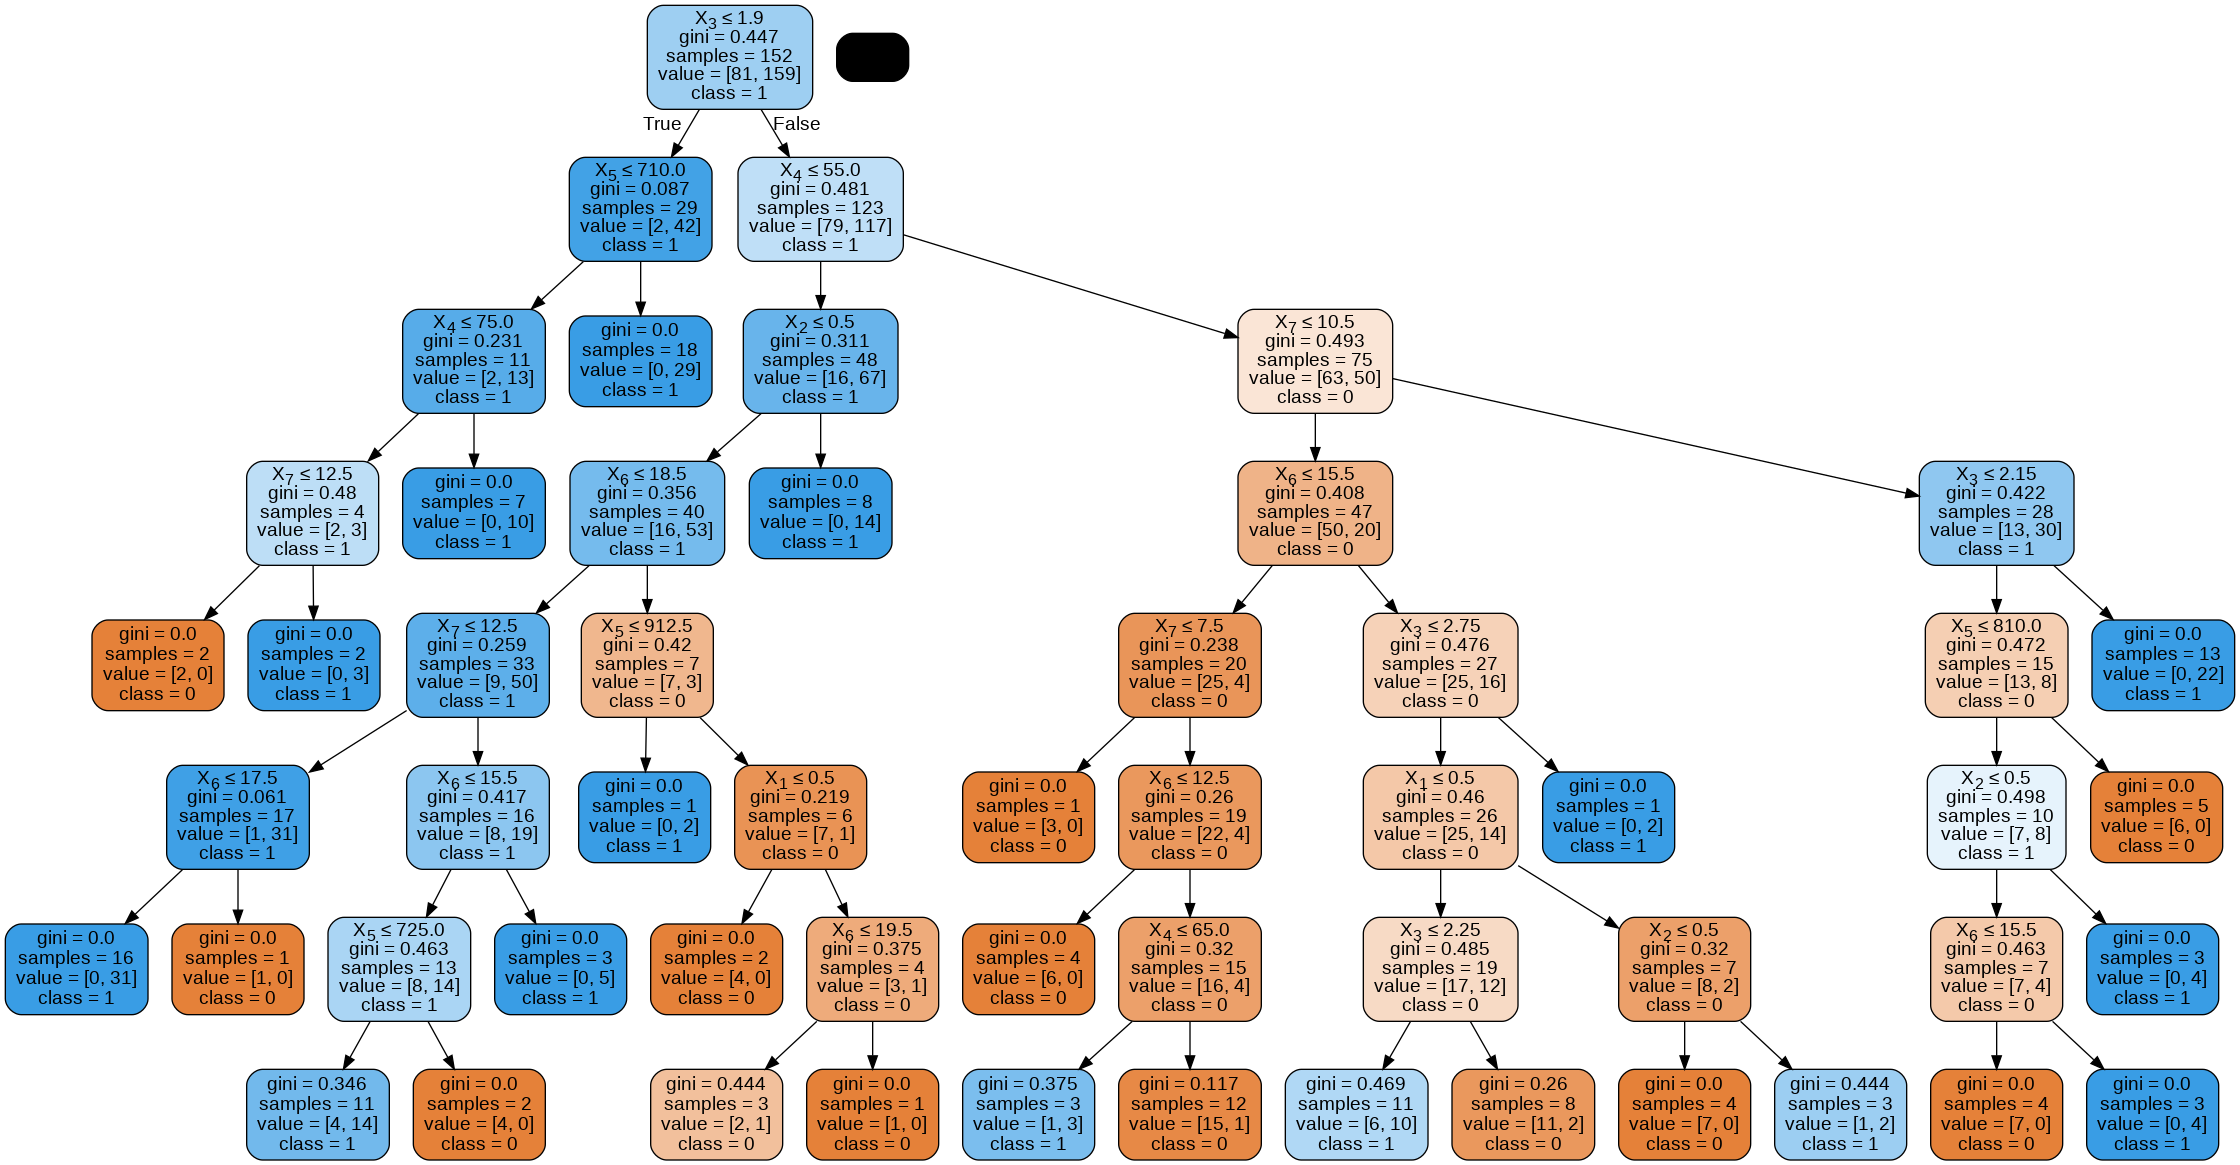

In [90]:
# Train
model = RandomForestClassifier(random_state=random_seed, max_depth=7)
model.fit(X_train,y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

# Plot
# tree = clf.estimators_[0]
tree = model.estimators_[0]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('model_random_forest.png')
Image(graph.create_png())

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob = model.predict_proba(X_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.9502262443438914


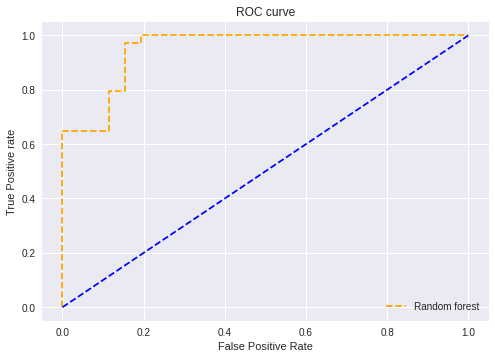

In [92]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

Feature 0: Face Down (Flat), Score: 0.01711
Feature 1: Face Down (Tilted)	, Score: 0.01525
Feature 2: Add NaCl, Score: 0.03284
Feature 3: Distance of S outside Furnace (in cm), Score: 0.15362
Feature 4: Flow rate (sccm), Score: 0.25404
Feature 5: Reaction Temperature (°C), Score: 0.23589
Feature 6: Ramp time (min), Score: 0.13847
Feature 7: Reaction time (min), Score: 0.15277


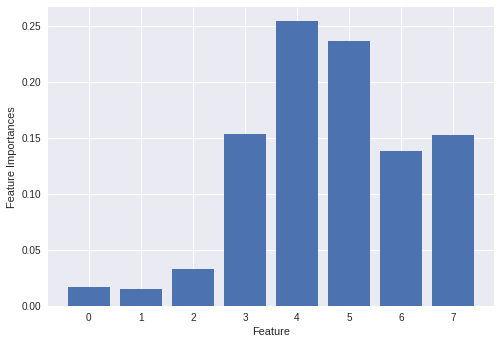

In [93]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %0d: %s, Score: %.5f' % (i, columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Feature Importances')
plt.show()

# Mock input datasets

## Generate dataset

In [94]:
import pandas as pd
import numpy as np
import time

addNaCl = [0, 1]
sDist = np.linspace(0.5, 3.5, 6)
faceDown_tiled = [0, 1]
flowRate = np.linspace(10, 250, 25)
temp = np.linspace(500, 975, 20)
ramp = np.linspace(10, 30, 21)
reactTime = np.linspace(5, 15, 11)

res = []
count = 0
init_time = time.time()

for a in addNaCl:
  for s in sDist:
    for face in faceDown_tiled:
      for flow in flowRate:
        for tmp in temp:
          for r in ramp:
            for t in reactTime:
              res.append([a, s, face, flow, tmp, r, t])
              count += 1
              
print(f'time: {round(time.time() - init_time, 1)} s')
print(f'count: {count}')

time: 5.2 s
count: 2772000


In [95]:
df_describe = pd.DataFrame(res)
df_describe.describe()

,0,1,2,3,4,5,6
count,2772000.0,2.772000e+06,2772000.0,2.772000e+06,2.772000e+06,2.772000e+06,2.772000e+06
mean,0.5,2.000000e+00,0.5,1.300000e+02,7.375000e+02,2.000000e+01,1.000000e+01
std,0.5,1.024695e+00,0.5,7.211104e+01,1.441571e+02,6.055302e+00,3.162278e+00
min,0.0,5.000000e-01,0.0,1.000000e+01,5.000000e+02,1.000000e+01,5.000000e+00
25%,0.0,1.100000e+00,0.0,7.000000e+01,6.187500e+02,1.500000e+01,7.000000e+00
50%,0.5,2.000000e+00,0.5,1.300000e+02,7.375000e+02,2.000000e+01,1.000000e+01
75%,1.0,2.900000e+00,1.0,1.900000e+02,8.562500e+02,2.500000e+01,1.300000e+01
max,1.0,3.500000e+00,1.0,2.500000e+02,9.750000e+02,3.000000e+01,1.500000e+01


## Encoding the Independent Variable

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X_test_mock = np.array(ct.fit_transform(df_describe))

In [97]:
print(X_test_mock)

[[  1.   0.   0. ... 500.  10.   5.]
 [  1.   0.   0. ... 500.  10.   6.]
 [  1.   0.   0. ... 500.  10.   7.]
 ...
 [  0.   1.   1. ... 975.  30.  13.]
 [  0.   1.   1. ... 975.  30.  14.]
 [  0.   1.   1. ... 975.  30.  15.]]


## Predict with best model

In [98]:
import time

init_time = time.time()

# Predict probability
probas = model.predict_proba(X_test_mock)

print(f'time: {round(time.time() - init_time, 1)} s')
print(f'probas: {probas}')

# df_predict = pd.DataFrame(probas)
# df_predict.describe()

time: 17.7 s
probas: [[0.63338095 0.36661905]
 [0.63338095 0.36661905]
 [0.63338095 0.36661905]
 ...
 [0.40722222 0.59277778]
 [0.41722222 0.58277778]
 [0.43007937 0.56992063]]


In [99]:
columns = [
  'Add NaCl',
  'Distance of S outside Furnace (in cm)',
  'Flat/Tilted',
  'Flow rate (sccm)',
  'Reaction Temperature (°C)',
  'Ramp time (min)',
  'Reaction time (min)',
  'Fail prob',
  'Success prob',
]

In [100]:
import matplotlib.pyplot as plt

con = np.concatenate((res, probas), axis=1)
# print(f'con: {con}')
con = con[con[:, -1].argsort()[::-1]]
df = pd.DataFrame(con)
df.columns = columns
df.head(10)

,Add NaCl,Distance of S outside Furnace (in cm),Flat/Tilted,Flow rate (sccm),Reaction Temperature (°C),Ramp time (min),Reaction time (min),Fail prob,Success prob
0,1.0,1.7,0.0,90.0,675.0,16.0,15.0,0.0,1.0
1,1.0,1.7,0.0,80.0,725.0,16.0,13.0,0.0,1.0
2,1.0,1.7,0.0,90.0,725.0,17.0,13.0,0.0,1.0
3,1.0,1.7,0.0,80.0,650.0,16.0,13.0,0.0,1.0
4,1.0,1.7,0.0,90.0,725.0,17.0,14.0,0.0,1.0
5,1.0,1.7,0.0,80.0,650.0,16.0,14.0,0.0,1.0
6,1.0,1.7,0.0,90.0,725.0,17.0,15.0,0.0,1.0
7,1.0,1.7,0.0,80.0,725.0,16.0,12.0,0.0,1.0
8,1.0,1.7,0.0,80.0,650.0,16.0,15.0,0.0,1.0
9,1.0,1.7,0.0,80.0,650.0,17.0,13.0,0.0,1.0


In [101]:
df.head(20000).describe()

,Add NaCl,Distance of S outside Furnace (in cm),Flat/Tilted,Flow rate (sccm),Reaction Temperature (°C),Ramp time (min),Reaction time (min),Fail prob,Success prob
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.81775,2.231150,0.353250,144.703000,700.561250,19.182600,13.581450,0.032746,0.967254
std,0.38606,0.851405,0.477991,74.446752,56.646948,4.383665,1.196845,0.010917,0.010917
min,0.00000,0.500000,0.000000,10.000000,550.000000,14.000000,5.000000,0.000000,0.954500
25%,1.00000,1.700000,0.000000,80.000000,650.000000,16.000000,13.000000,0.026667,0.959415
50%,1.00000,2.300000,0.000000,160.000000,725.000000,17.000000,14.000000,0.036152,0.963848
75%,1.00000,2.900000,1.000000,210.000000,725.000000,22.000000,15.000000,0.040585,0.973333
max,1.00000,3.500000,1.000000,250.000000,875.000000,30.000000,15.000000,0.045500,1.000000


In [102]:
# for column in df:
#     plt.figure()
#     df.boxplot([column], vert=False)

# Predict extra MoS2 data

## Read dataset

In [103]:
dataset_test_extra = pd.read_csv('/content/mos2_test_extra.csv')
X_test_extra = dataset_test_extra.iloc[:, :-1].values
y_test_extra = dataset_test_extra.iloc[:, -1].values
print(X_test_extra)
print(y_test_extra)
df_describe = pd.DataFrame(dataset_test_extra)
df_describe.describe()

[[0 3.5 'F' 70 800 100 20]
 [1 26.0 'F' 22 560 15 50]
 [0 2.0 'F' 50 530 30 60]
 [0 2.0 'F' 100 780 38 15]
 [0 18.0 'F' 10 760 50 30]
 [1 2.0 'T' 120 800 30 30]
 [0 30.0 'F' 45 820 40 10]
 [1 14.0 'F' 120 650 20 10]
 [1 2.0 'F' 60 680 20 12]
 [0 10.0 'F' 150 770 19 15]]
[1 1 1 1 1 1 1 1 1 1]


,Add NaCl,Distance of S outside Furnace (in cm),Flow rate (sccm),Reaction Temperature (°C),Ramp time (min),Reaction time (min),Result
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0
mean,0.400000,10.950000,74.70000,715.000000,36.200000,25.200000,1.0
std,0.516398,10.673045,46.07735,104.589143,25.001333,17.459795,0.0
min,0.000000,2.000000,10.00000,530.000000,15.000000,10.000000,1.0
25%,0.000000,2.000000,46.25000,657.500000,20.000000,12.750000,1.0
50%,0.000000,6.750000,65.00000,765.000000,30.000000,17.500000,1.0
75%,1.000000,17.000000,115.00000,795.000000,39.500000,30.000000,1.0
max,1.000000,30.000000,150.00000,820.000000,100.000000,60.000000,1.0


## Encoding the Independent Variable

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X_test_extra = np.array(ct.fit_transform(X_test_extra))

In [105]:
print(X_test_extra)

[[1.0 0.0 0 3.5 70 800 100 20]
 [1.0 0.0 1 26.0 22 560 15 50]
 [1.0 0.0 0 2.0 50 530 30 60]
 [1.0 0.0 0 2.0 100 780 38 15]
 [1.0 0.0 0 18.0 10 760 50 30]
 [0.0 1.0 1 2.0 120 800 30 30]
 [1.0 0.0 0 30.0 45 820 40 10]
 [1.0 0.0 1 14.0 120 650 20 10]
 [1.0 0.0 1 2.0 60 680 20 12]
 [1.0 0.0 0 10.0 150 770 19 15]]


In [106]:
columns = [
  'Face Down (Flat)',
  'Face Down (Tilted)	',
  'Add NaCl',
  'Distance of S outside Furnace (in cm)',
  'Flow rate (sccm)',
  'Reaction Temperature (°C)',
  'Ramp time (min)',
  'Reaction time (min)',
]

## Predict with best model

In [107]:
# Predict
y_pred_test_extra = model.predict(X_test_extra)

# Metrics
print(f'Accuracy: {accuracy_score(y_test_extra, y_pred_test_extra)}')
print(f'Precision: {precision_score(y_test_extra, y_pred_test_extra)}')
print(f'Recall: {recall_score(y_test_extra, y_pred_test_extra)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test_extra, y_pred_test_extra)}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion matrix: 
 [[10]]


# Predict extra WSe2 data

## Read dataset

In [108]:
dataset_test_extra = pd.read_csv('/content/wse2_test_extra.csv')
X_test_extra = dataset_test_extra.iloc[:, :-1].values
y_test_extra = dataset_test_extra.iloc[:, -1].values
print(X_test_extra)
print(y_test_extra)
df_describe = pd.DataFrame(dataset_test_extra)
df_describe.describe()

[[0 16.5 'F' 75 925 40.0 25]
 [0 23.0 'F' 150 550 17.0 10]
 [0 55.0 'F' 320 950 19.0 15]
 [0 0.5 'F' 14 400 16.0 12]
 [0 19.0 'F' 105 890 30.0 15]
 [0 24.375 'F' 80 925 25.0 15]
 [0 24.375 'F' 65 900 15.0 15]
 [0 24.375 'F' 65 950 24.9 15]
 [0 24.375 'F' 80 775 35.0 5]
 [0 24.375 'F' 94 700 24.9 15]
 [0 24.375 'F' 15 700 24.9 30]
 [0 24.375 'F' 80 925 37.0 15]
 [0 24.375 'T' 80 945 15.0 10]]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


,Add NaCl,Distance of S outside Furnace (in cm),Flow rate (sccm),Reaction Temperature (°C),Ramp time (min),Reaction time (min),Result
count,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,0.0,23.769231,94.076923,810.384615,24.900000,15.153846,1.0
std,0.0,11.532319,76.267579,176.239202,8.538638,6.348834,0.0
min,0.0,0.500000,14.000000,400.000000,15.000000,5.000000,1.0
25%,0.0,23.000000,65.000000,700.000000,17.000000,12.000000,1.0
50%,0.0,24.375000,80.000000,900.000000,24.900000,15.000000,1.0
75%,0.0,24.375000,94.000000,925.000000,30.000000,15.000000,1.0
max,0.0,55.000000,320.000000,950.000000,40.000000,30.000000,1.0


## Encoding the Independent Variable

In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X_test_extra = np.array(ct.fit_transform(X_test_extra))

In [110]:
print(X_test_extra)

[[1.0 0.0 0 16.5 75 925 40.0 25]
 [1.0 0.0 0 23.0 150 550 17.0 10]
 [1.0 0.0 0 55.0 320 950 19.0 15]
 [1.0 0.0 0 0.5 14 400 16.0 12]
 [1.0 0.0 0 19.0 105 890 30.0 15]
 [1.0 0.0 0 24.375 80 925 25.0 15]
 [1.0 0.0 0 24.375 65 900 15.0 15]
 [1.0 0.0 0 24.375 65 950 24.9 15]
 [1.0 0.0 0 24.375 80 775 35.0 5]
 [1.0 0.0 0 24.375 94 700 24.9 15]
 [1.0 0.0 0 24.375 15 700 24.9 30]
 [1.0 0.0 0 24.375 80 925 37.0 15]
 [0.0 1.0 0 24.375 80 945 15.0 10]]


In [111]:
columns = [
  'Face Down (Flat)',
  'Face Down (Tilted)	',
  'Add NaCl',
  'Distance of S outside Furnace (in cm)',
  'Flow rate (sccm)',
  'Reaction Temperature (°C)',
  'Ramp time (min)',
  'Reaction time (min)',
]

## Predict with best model

In [112]:
# Predict
y_pred_test_extra = model.predict(X_test_extra)

# Metrics
print(f'Accuracy: {accuracy_score(y_test_extra, y_pred_test_extra)}')
print(f'Precision: {precision_score(y_test_extra, y_pred_test_extra)}')
print(f'Recall: {recall_score(y_test_extra, y_pred_test_extra)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test_extra, y_pred_test_extra)}')

Accuracy: 0.8461538461538461
Precision: 1.0
Recall: 0.8461538461538461
Confusion matrix: 
 [[ 0  0]
 [ 2 11]]


# MDF search for more WSe2 data(NOT FOUND)

In [113]:
# !pip install mdf_forge

In [114]:
# from mdf_forge.forge import Forge  # This is the only required import for Forge.

# # You can set up Forge with no arguments. Forge will automatically authenticate and connect to MDF.
# mdf = Forge()

# res = mdf.search("WSe2")
# res

# # Only have WSe2 XPS and jarvis data which are not CVD growth data

In [115]:
# from tqdm import tqdm
# import pandas as pd
# from mdf_forge.forge import Forge

# mdf = Forge()

# # First, let's search for all the datasets. There are less than 10,000 currently, so `search()` will work fine.
# res = mdf.search("mdf.resource_type:dataset", advanced=True)
# # Now, let's pull out the source_name, title, and number of records for each dataset.
# mdf_resources = []
# for r in tqdm(res):
#     q = "mdf.resource_type:record AND mdf.source_name:" + r["mdf"]["source_name"]
#     x, info = mdf.search(q, advanced=True, info=True, limit=0)
#     mdf_resources.append((r['mdf']['source_name'], r['dc']["titles"][0]['title'], info["total_query_matches"]))
# df = pd.DataFrame(mdf_resources, columns=['source_name', 'title', 'num_records'])


# # Finally, we can print the data we gathered.
# print("Number of data resources: {n_datasets}".format(n_datasets=len(df)))
# df.sort_values(by="num_records", ascending=False).head(15)